<a href="https://colab.research.google.com/github/msrepo/ml-mscise-2023/blob/master/deep_learning/mlp/XOR_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original code by:

STAT 453: Deep Learning (Spring 2020)
Instructor: Sebastian Raschka (sraschka@wisc.edu)

Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat453-ss2020/
GitHub repository: https://github.com/rasbt/stat453-deep-learning-ss20

Solving the XOR Problem

In [2]:
import torch
import torch.nn.functional as F
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

SEED=123


In [3]:
df = pd.read_csv('/content/xor.csv')
x = df[['x1','x2']].values
y = df['class label'].values

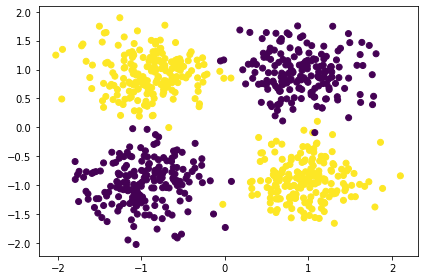

In [8]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.tight_layout()

**Multilayer Perceptron with Linear Activations**

In [11]:
class MLPLinear(torch.nn.Module):
  def __init__(self, num_features, num_hidden_1, num_classes):
    super(MLPLinear, self).__init__()
    self.num_classes = num_classes

    self.linear_1 = torch.nn.Linear(num_features, num_hidden_1)
    self.linear_out = torch.nn.Linear(num_hidden_1, num_classes)

  def forward(self, x):
    out = self.linear_1(x)

    logits = self.linear_out(out)
    probas = F.softmax(logits, dim=1)
    return logits, probas

In [48]:
def train(model, features, targets, optimizer, num_epochs):
  start_time = time.time()
  minibatch_cost = []

  for epoch in range(num_epochs):
    logits, probas = model(features)
    
    cost = F.cross_entropy(logits, targets)
    optimizer.zero_grad()

    cost.backward()
    minibatch_cost.append(cost)
    optimizer.step()

    print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} | Cost: {cost:.4f}')

  print(f'Total Training Time: {(time.time() - start_time)/60:.2f} min')  

In [49]:
torch.manual_seed(SEED)

model1 = MLPLinear(num_features=2,
                   num_hidden_1=50,
                   num_classes=2)
optimizer = torch.optim.SGD(model1.parameters(), lr=0.1)

In [50]:
features = torch.tensor(x, dtype=torch.float)
targets = torch.tensor(y, dtype=torch.long)
train(model1, features, targets, optimizer, 25)

Epoch: 001/025 | Cost: 0.7075
Epoch: 002/025 | Cost: 0.6980
Epoch: 003/025 | Cost: 0.6946
Epoch: 004/025 | Cost: 0.6933
Epoch: 005/025 | Cost: 0.6929
Epoch: 006/025 | Cost: 0.6928
Epoch: 007/025 | Cost: 0.6927
Epoch: 008/025 | Cost: 0.6927
Epoch: 009/025 | Cost: 0.6927
Epoch: 010/025 | Cost: 0.6927
Epoch: 011/025 | Cost: 0.6927
Epoch: 012/025 | Cost: 0.6927
Epoch: 013/025 | Cost: 0.6927
Epoch: 014/025 | Cost: 0.6927
Epoch: 015/025 | Cost: 0.6927
Epoch: 016/025 | Cost: 0.6927
Epoch: 017/025 | Cost: 0.6927
Epoch: 018/025 | Cost: 0.6927
Epoch: 019/025 | Cost: 0.6927
Epoch: 020/025 | Cost: 0.6927
Epoch: 021/025 | Cost: 0.6927
Epoch: 022/025 | Cost: 0.6927
Epoch: 023/025 | Cost: 0.6927
Epoch: 024/025 | Cost: 0.6927
Epoch: 025/025 | Cost: 0.6927
Total Training Time: 0.00 min


In [51]:
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_regions(x,y,classifier,resolution=0.02):

  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = x[:,0].min() - 1, x[:,0].max() + 1
  x2_min, x2_max = x[:,1].min() - 1, x[:,1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         (np.arange(x2_min, x2_max, resolution))
  )
  tensor = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T).float()
  logits, probas = classifier.forward(tensor)
  z = np.argmax(probas.detach().numpy(), axis=1)

  z = z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x[y==cl,0],x[y==cl,1],alpha=0.8, color=cmap(idx),edgecolor='black',marker=markers[idx],label=cl)

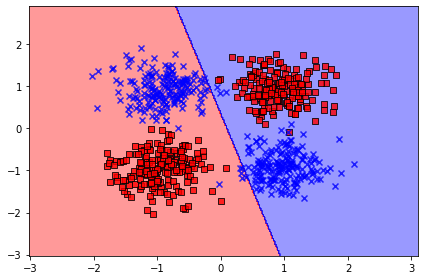

In [52]:
plot_decision_regions(features, targets, classifier=model1)
plt.tight_layout()

**Multilayer Perceptron with Non-Linear Activations**

In [53]:
class MLPRelu(torch.nn.Module):
  def __init__(self, num_features, num_hidden_1, num_classes):
    super(MLPRelu, self).__init__()

    self.num_classes = num_classes

    self.linear_1 = torch.nn.Linear(num_features, num_hidden_1)
    self.linear_out = torch.nn.Linear(num_hidden_1, num_classes)
  
  def forward(self, x):
    out = self.linear_1(x)
    out = F.relu(out)

    logits = self.linear_out(out)
    probas = F.softmax(logits, dim=1)
    return logits, probas

In [54]:
torch.manual_seed(SEED)
model2 = MLPRelu(num_features=2,
                 num_hidden_1=50,
                 num_classes=2)
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)

In [55]:
train(model2,features,targets,optimizer,25)

Epoch: 001/025 | Cost: 0.7163
Epoch: 002/025 | Cost: 0.6874
Epoch: 003/025 | Cost: 0.6631
Epoch: 004/025 | Cost: 0.6412
Epoch: 005/025 | Cost: 0.6210
Epoch: 006/025 | Cost: 0.6019
Epoch: 007/025 | Cost: 0.5838
Epoch: 008/025 | Cost: 0.5665
Epoch: 009/025 | Cost: 0.5501
Epoch: 010/025 | Cost: 0.5344
Epoch: 011/025 | Cost: 0.5193
Epoch: 012/025 | Cost: 0.5049
Epoch: 013/025 | Cost: 0.4910
Epoch: 014/025 | Cost: 0.4777
Epoch: 015/025 | Cost: 0.4649
Epoch: 016/025 | Cost: 0.4525
Epoch: 017/025 | Cost: 0.4406
Epoch: 018/025 | Cost: 0.4291
Epoch: 019/025 | Cost: 0.4181
Epoch: 020/025 | Cost: 0.4074
Epoch: 021/025 | Cost: 0.3971
Epoch: 022/025 | Cost: 0.3872
Epoch: 023/025 | Cost: 0.3776
Epoch: 024/025 | Cost: 0.3684
Epoch: 025/025 | Cost: 0.3594
Total Training Time: 0.00 min


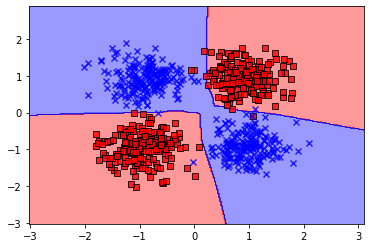

In [56]:
plot_decision_regions(features, targets, classifier=model2)
